# Draft analysis 

---

Group name: Doreen Mack, David Riethmann

---


- Logistische Regression: Infested/not infested oder tip of stem broken?
- Multikollinearität bei linearer Regression
- Confusion Matrix
- Conclusion


## 1 Introduction

For our project we have chosen a dataset about the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in southern California. Our motivation is to find patterns and trends within the data and define factors and potential predictors associated with the growth of Dalmatian toadflax and the spread of weevil populations.

Dalmatian toadflax is an invasive plant that is considered an undesirable weed in southern California. It can thrive and spread rapidly in a variety of ecosystems, including grasslands and roadsides. Invasive plants such as Dalmatian toadflax can cause ecological problems. On the on hand, it can displace native plants and as a result reduce biodiversity. It can also have an impact on the availability of habitat for native animals as the dominance of Dalmatian toadflax can disrupt the strucutre and function of ecosystems. On the other hand, we have to think of the soil composition. Invasive plants can alter the soil by removing nutrients which can have an impact on the native vegetation. Moreover, Dalmatian toadflax can tend to accumulate dry material, which can increase fire hazard.

Therefore, attempts are being made to control the spread of Dalmatian toadflax using weevil populations. They were released in the investigated area of southern California.

General research questions:

- Which aspects can help predict the total main stem length?
- Are plants that are infested by weevils really more likely to remain smaller?

<span style="color:red">-What factors can help predict whether the tip of the plant is broken or not?</span>

Our hypothesis is that the spread of weevil populations really contributes to the reduction of Dalmatian toadflax vegetation in this area.

## 2 Setup

We start by importing the required libraries and modules.
These are:
- Numpy: A library for numerical operations which provides support for arrays and matrices along with mathematical functions to operate on these elements.
- Pandas: A library for data analysis which provides data structures such as series and DataFrames that form the basis for working with data.
- Altair: A library for statistical visualization that provides a variety of graphics.
- Scikit-Learn: A machine learning library which provides tools for data analysis and modelling. From Scikit-Learn we have imported a bunch of modules e.g. to calculate statistical measures or split the dataset.

In [1]:
import pickle
import numpy as np
import pandas as pd
import altair as alt

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

## 3 Data

### 3.1 Import data

Next we are using pandas to read the data form our CSV file and create a DataFrame which we call "df" and which will contain the data from the CSV file in tabular format. 

We also create a DataFrame "meta" which will contain our data dictionary. The data dictionary provides additional information about the columns and variables in "df". To read the data from our excel file we also use the pandas function.

In [2]:
df = pd.read_csv('../data/raw/dissections_2012_HV.csv')
meta = pd.read_excel('../references/Data Dictionary.xlsx')

### 3.2 Data structure

Let´s fist take a look at the metadata. We want to get a brief overview of the data in our "df".
We can see there are 25 variables. The description, role, type and format of each variable in our DataFrame can be taken from the following table:

In [3]:
meta #hier müssten wir noch infested und tip of stem broken ändern je nachdem was predictor variable für log ist

,Name,Description,Role,Type,Format
0,year,year that stems were infested,-,numeric,int64
1,diss date,date dissected in the laboratory,-,numeric,object
2,date,date collected in the field,-,numeric,object
3,site,six study sites at Hungry Valley study area,Predictor,nominal,object
4,trt,release or not in 2008 and 2014,-,nominal,object
5,BC,"1 = early establishment, 0 = late establishment",-,nominal,int64
6,stem #,stem ID,ID,numeric,int64
7,stem diam bottom (mm),diameter of stem at bottom,Predictor,numeric,float64
8,main stem length (cm),"length of stem, excluding side branches","Predictor, response",numeric,float64
9,total meja,"sum of no. empty chambers, dead larvae, dead p...",Predictor,numeric,int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1066 non-null   int64  
 1   diss date               1066 non-null   object 
 2   Date                    1066 non-null   object 
 3   site                    1066 non-null   object 
 4   trt                     1066 non-null   object 
 5   BC                      1066 non-null   int64  
 6   stem #                  1066 non-null   int64  
 7   stem diam bottom (mm)   1066 non-null   float64
 8    main stem length (cm)  1066 non-null   float64
 9   Total Meja              1066 non-null   int64  
 10  Meja/100 cm             1066 non-null   float64
 11  infested                1066 non-null   int64  
 12  diam top (mm)           370 non-null    float64
 13  Tip of Stem broken      500 non-null    object 
 14  side branches (cm)      84 non-null     

In [5]:
df.head().T

,0,1,2,3,4
year,2012,2012,2012,2012,2012
diss date,12/7/12,12/8/12,12/10/12,12/10/12,12/10/12
Date,12/3/12,12/3/12,12/3/12,12/3/12,12/3/12
site,West,West,West,West,West
trt,Release,Release,Release,Release,Release
BC,1,1,1,1,1
stem #,1,2,3,4,5
stem diam bottom (mm),7.8,8.2,6.6,6.4,6.5
main stem length (cm),64.0,57.5,33.0,59.0,45.0
Total Meja,21,46,32,30,31


In [6]:
df.tail().T

,1061,1062,1063,1064,1065
year,2018,2018,2018,2018,2018
diss date,8/23/19,8/23/19,8/23/19,8/23/19,8/23/19
Date,5/9/19,5/9/19,5/9/19,5/9/19,5/9/19
site,USFS-North,USFS-North,USFS-North,USFS-North,USFS-North
trt,Check,Check,Check,Check,Check
BC,1,1,1,1,1
stem #,16,17,18,19,20
stem diam bottom (mm),4.5,5.3,6.8,6.9,7.1
main stem length (cm),46.0,51.0,109.0,104.0,96.0
Total Meja,8,1,4,1,2


We use the describe function to compute summary statistics for all numerical columns in our DataFrame. It includes the count, mean, standard deviation, minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum. 
To switch rows and columns the transpose operation is used.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1066.0,2014.288931,2.034678,2012.0,2012.000,2014.00,2016.000,2018.0
BC,1066.0,0.487805,0.500086,0.0,0.000,0.00,1.000,1.0
stem #,1066.0,25.863039,29.670016,1.0,8.000,15.00,32.000,141.0
stem diam bottom (mm),1066.0,4.963227,1.832666,1.1,3.700,4.90,6.200,12.2
main stem length (cm),1066.0,51.277674,24.923005,2.0,34.000,49.00,67.000,135.0
Total Meja,1066.0,5.273921,9.163923,0.0,0.000,0.00,8.000,67.0
Meja/100 cm,1066.0,11.513602,20.270924,0.0,0.000,0.00,15.550,133.3
infested,1066.0,0.454034,0.498116,0.0,0.000,0.00,1.000,1.0
diam top (mm),370.0,1.781081,1.224510,0.2,0.900,1.50,2.300,7.6
side branches (cm),84.0,60.226190,47.528647,8.0,29.500,45.50,76.750,250.0


### 3.3 Data corrections

Data corrections must be carried out as a basis for data analysis. We start by taking a look at the columns designations:

In [8]:
df.columns

Index(['year', 'diss date', 'Date', 'site', 'trt', 'BC', 'stem #',
       'stem diam bottom (mm)', ' main stem length (cm)', 'Total Meja',
       'Meja/100 cm', 'infested', 'diam top (mm)', 'Tip of Stem broken',
       'side branches (cm)', 'No. empty chambers', 'total chamber length',
       'live adults', 'dead adults', 'dead larvae', 'dead pupae', 'parasitoid',
       'live pupa', 'live larva', 'Total No. adults'],
      dtype='object')

We quickly see that the column names have some peculiarities that can lead to problems for example upper and lower case, special characters. Therefore we want to standardize column names and make them more consistent by using regular expressions.

We start by using str.lower in order to convert all characters in string to lowercase.

In [9]:
df.columns = df.columns.str.lower()

For the column "stem #" we want to replace # by ID.

In [10]:
df.columns = df.columns.str.replace(r"\#", r"id", regex=True)

Next we are removing leading and trailing whitespaces from each column name.

In [11]:
df.columns = df.columns.str.replace(r"^\s+|\s+$", r"", regex=True)

Moreover we are replacing all spaces in each column name with underscores.

In [12]:
df.columns = df.columns.str.replace(r"\s", r"_", regex=True)

In the beginning we saw that many special characters are being used and units are given in brackets. With the next codeline we are replacing all opening brackets in each column name with "in_".

In [13]:
df.columns = df.columns.str.replace(r"\(", r"in_", regex=True)

After that we are removing all closing brackets in each column name.

In [14]:
df.columns = df.columns.str.replace(r"\)", r"", regex=True)

Moreover we have to remove all periods and replace all forward slashes in each column name with "per".

In [15]:
df.columns = df.columns.str.replace(r"\/", r"_per_", regex=True)

In [16]:
df.columns = df.columns.str.replace(r"\.", r"", regex=True)

In the next codelines we are replacing no by number and year by year_infested.

In [17]:
df.columns = df.columns.str.replace(r"no", r"number", regex=True)

In [18]:
df.rename(columns={'year': 'year_infested'}, inplace=True)

As some columns contain no data or data that is not relevant for further analysis, we omit the corresponding columns.

In [19]:
df = df.drop(columns=['bc', 'trt', 'live_adults', 'dead_adults', 'dead_larvae', 'dead_pupae', 'parasitoid', 'live_pupa', 'live_larva', 'total_chamber_length'])

In the "tip_of_stem_broken" column, c stands for cut and b for broken. If neither c nor b is given, we assume that the tip of the stem is intact. An intact tip leads to a greater length of the main stem, and we want to use the data as a categorical predictor. Therefore, a broken or cut stem tip is assigned the value 1 and an intact stem tip is assigned the value 0. We are using a loop to iterate over the values in the 'tip_of_stem_broken' column. For each value, it checks if the value is equal to 'b' or 'c'. If the condition is true, it assigns the value 1 to the corresponding cell in the 'tip_of_stem_broken' column, otherwise, it assigns the value 0.

In [20]:
for v in range(len(df['tip_of_stem_broken'])):
    if df.loc[v, 'tip_of_stem_broken'] == 'b' or df.at[v, 'tip_of_stem_broken'] == 'c':
        df.loc[v, 'tip_of_stem_broken'] = 1
    else:
        df.loc[v, 'tip_of_stem_broken'] = 0

Afterwards we converte the values in the column to integer type.

In [21]:
df['tip_of_stem_broken'] = df['tip_of_stem_broken'].astype('int64')

Moreover a few other convertions have to be made.
The values in column "site" are converted to category type and the values in columns "date" and "diss_date" are converted to datetime objects but we only extract the date component.

In [22]:
df['site'] = df['site'].astype('category')

In [23]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['date'] = df['date'].dt.date

In [24]:
df['diss_date'] = pd.to_datetime(df['diss_date'], format='%m/%d/%y')
df['diss_date'] = df['diss_date'].dt.date

At last we are converting the values in the two diameter columns from millimeters to centimeters and round to two decimal places. New columns are crated for the diameter columns in centimeters.

In [25]:
df['stem_diam_bottom_in_cm'] = df.loc[:, 'stem_diam_bottom_in_mm'] / 10

In [26]:
df[['stem_diam_bottom_in_cm']] = df[['stem_diam_bottom_in_cm']].round(2)

In [27]:
df['diam_top_in_cm'] = df.loc[:, 'diam_top_in_mm'] / 10

This is the final result of the columns names:

In [28]:
df.columns

Index(['year_infested', 'diss_date', 'date', 'site', 'stem_id',
       'stem_diam_bottom_in_mm', 'main_stem_length_in_cm', 'total_meja',
       'meja_per_100_cm', 'infested', 'diam_top_in_mm', 'tip_of_stem_broken',
       'side_branches_in_cm', 'number_empty_chambers', 'total_number_adults',
       'stem_diam_bottom_in_cm', 'diam_top_in_cm'],
      dtype='object')

Finally we save the corrected DataFrame as CSV file.

In [29]:
df.to_csv('../data/interim/dissections_2012_HV_corrected.csv')

### 3.4 Variable lists

To get an overview of the variables we now have in our corrected DataFrame, we call df.info(). This method provides a summary of the DataFrame, including information about its structure, e.g. the number of entries and the number of non-null values per column, as well as its data types.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year_infested           1066 non-null   int64   
 1   diss_date               1066 non-null   object  
 2   date                    1066 non-null   object  
 3   site                    1066 non-null   category
 4   stem_id                 1066 non-null   int64   
 5   stem_diam_bottom_in_mm  1066 non-null   float64 
 6   main_stem_length_in_cm  1066 non-null   float64 
 7   total_meja              1066 non-null   int64   
 8   meja_per_100_cm         1066 non-null   float64 
 9   infested                1066 non-null   int64   
 10  diam_top_in_mm          370 non-null    float64 
 11  tip_of_stem_broken      1066 non-null   int64   
 12  side_branches_in_cm     84 non-null     float64 
 13  number_empty_chambers   1066 non-null   int64   
 14  total_number_adults     

#### 3.4.1 Linear Regression

Now we need to prepare our linear regression analysis. As y_label we define the main stem length in cm, as this is the dependent variable we want to predict. Next, we define our possible predictor variables in a list called features:

- stem_diam_bottom_in_cm
- total_meja
- meja_per_100_cm
- diam_top_in_cm
- side_branches_in_cm

We want to use these variables to predict the main stem length of the plants and therefore define them as X.
Y is assigned a series containing the values from the column main stem length that is defined by the y_label_lin variable.

In [31]:
y_label_lin = 'main_stem_length_in_cm'

features_lin = ['stem_diam_bottom_in_cm', 'total_meja', 'meja_per_100_cm', 'diam_top_in_cm', 'side_branches_in_cm'] #, 'tip_of_stem_broken', 'infested', 'meja_per_100_cm', 'total_number_adults'

#### 3.4.2 Logistic Regression

For the logistic regression analysis, we want to predict whether a plant is infested or not in order to analyze whether plants infested by weevils are more likely to remain smaller and if weevils are really useful and effective as natural control agents.
Possible predictor variables are again defined in a features list:

- main_stem_length_cm
- stem_diam_bottom_cm
- side_branches_cm
- diam_top_cm
- tip_of_stem_broken
- site
- total_meja
- meja_per_100_cm
- total_number_adults

We want to use these variables to predict wheter the plant is infested or not and therefore define them as X.

In [32]:
# y_label_log = 'tip_of_stem_broken' hier Variablen so anpassen je nachdem was wir wählen auch oben in der Aufzählung
y_label_log = 'infested'

features_log = ['main_stem_length_in_cm', 'stem_diam_bottom_in_cm', 'side_branches_in_cm', 'diam_top_in_cm', 'tip_of_stem_broken'] #, 'infested', 'site', 'total_meja', 'meja_per_100_cm', 'total_number_adults'

### 3.5 Data splitting and imputation

Using df.info() method, we quickly recognized that columns diam_top_in_cm and side_branches_in_cm only contain fewer values.
We therefore can consider filling in the missing values using SimpleImputer class from Scikit-Learn.
There are three possible options now to proceed:

**Option 1: method = "imputed_mean"**
Option 1 uses imputation to fill in the missing values in the two specified columns. As strategy we specify mean so the missing values are replaced with the mean of each column.

**Option 2: method = "imputed_median"**
With option 2, the missing values in the two specified columns are also filled in by imputation. As a strategy, we specify the median so that the missing values are replaced by the median of each column.

**Option 3: method = "reduced"**
With option 3, we omit all rows with NaN values and use a reduced DataFrame.

**Please choose:**

- imputed_mean
- imputed_median
- reduced

During our analysis, we tested each option. The best results were achieved with option 3 "reduced", which uses a reduced data frame containing only rows for which all relevant data is available. Therefore, we proceed with "reduced".

In [33]:
method = "reduced" 

First, we define some functions.
The reduction function takes our DataFrame as an argument and performs some operations on a copy of our df. The column "side_branches_in_cm" is omitted, as are all rows containing NaN values. The function then returns the reduced DataFrame.

In [34]:
def reduction(df: pd.DataFrame):
    df_reduced = df.copy()
    df_reduced = df_reduced.drop("side_branches_in_cm", axis=1)
    df_reduced = df_reduced.dropna()
    features_lin.remove("side_branches_in_cm")
    features_log.remove("side_branches_in_cm")
    return df_reduced

The imputation function performs imputation on specified columns of our DataFrame "diam_top_in_cm and "side_branches_in_cm" using scikit-learn's SimpleImputer. The strategy parameter is expected to be a string, in our case "mean" or "median". The function returns the DataFrame with the imputed values.

In [35]:
def imputation(df: pd.DataFrame, strategy: str):
    imputer = SimpleImputer(strategy = strategy)
    df_imputed = df.copy()
    df_imputed[['diam_top_in_cm', 'side_branches_in_cm']] = imputer.fit_transform(df_imputed[['diam_top_in_cm', 'side_branches_in_cm']])
    df_imputed[['diam_top_in_cm']] = df_imputed[['diam_top_in_cm']].round(2)
    df_imputed[['side_branches_in_cm']] = df_imputed[['side_branches_in_cm']].round(2)
    return df_imputed

The function set_variables prepares the input DataFrame for our linear and logistic regression models. The features that we previously specified in our features_lin and features_log lists are extracted, as are our target variables y_label_lin and y_label_log. Rows with missing values in the target variable are to be dropped for both linear and logistic regression.

In [36]:
def set_variables(df: pd.DataFrame):
    X_lin = df.dropna(subset=[y_label_lin])[features_lin] 
    y_lin = df.dropna(subset=[y_label_lin])[y_label_lin] 
    X_log = df.dropna(subset=[y_label_log])[features_log] 
    y_log = df.dropna(subset=[y_label_log])[y_label_log]
    return X_lin, y_lin, X_log, y_log

Depending on the specified method the reduction or impuation function with mean or median is being applied and the variables for linear and logistic regression are set accordingly.

In [37]:
df_reduced = pd.DataFrame
df_imputed = pd.DataFrame

if method == "reduced":
    df_reduced = reduction(df=df)
    X_lin, y_lin, X_log, y_log = set_variables(df=df_reduced)
elif method == "imputed_mean":
    df_imputed = imputation(df=df, strategy="mean")
    X_lin, y_lin, X_log, y_log = set_variables(df=df_imputed)
elif method == "imputed_median":
    df_imputed = imputation(df=df, strategy="median")
    X_lin, y_lin, X_log, y_log = set_variables(df=df_imputed)

In [38]:
if not df_reduced.empty:
    df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 1062
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year_infested           370 non-null    int64   
 1   diss_date               370 non-null    object  
 2   date                    370 non-null    object  
 3   site                    370 non-null    category
 4   stem_id                 370 non-null    int64   
 5   stem_diam_bottom_in_mm  370 non-null    float64 
 6   main_stem_length_in_cm  370 non-null    float64 
 7   total_meja              370 non-null    int64   
 8   meja_per_100_cm         370 non-null    float64 
 9   infested                370 non-null    int64   
 10  diam_top_in_mm          370 non-null    float64 
 11  tip_of_stem_broken      370 non-null    int64   
 12  number_empty_chambers   370 non-null    int64   
 13  total_number_adults     370 non-null    int64   
 14  stem_diam_bottom_in_cm  3

In [39]:
if not df_imputed.empty:
    df_imputed.info()

To continue, our data must be split into training and test sets. We use the train_test_split function from scikit-learn to perform the split. We define 20% of the data set to be included in the test split. The remaining 80% of the data set is therefore used as the training set.

**Linear Regression:**

In [40]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin,
    y_lin,
    test_size=0.2,
    random_state=0
)

After the splitting we create a new DatFrame called df_train from the training set and save it as CSV file.

In [41]:
df_train_lin = pd.DataFrame(X_train_lin.copy())
df_train_lin = df_train_lin.join(pd.DataFrame(y_train_lin))
df_train_lin.to_csv('../data/interim/train_data_lin.csv')

**Logistic Regression:**

In [42]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log,
    y_log,
    test_size=0.2,
    random_state=0
)

In [43]:
df_train_log = pd.DataFrame(X_train_log.copy())
df_train_log = df_train_log.join(pd.DataFrame(y_train_log))
df_train_log.to_csv('../data/interim/train_data_log.csv')

## 4 Analysis

### 4.1 Descriptive statistics

Typical methods of descriptive data analysis are the calculation of mean values, medians and standard deviations as well as the creation of histograms, box plots or cross tables. It focuses on the organization and description of existing data without in-depth analysis or hypothesis formation.

#### 4.1.1 Linear Regression

First, we use the describe function to compute summary statistics for all numerical columns in our corrected Test-DataFrame.

In [44]:
df_train_lin.describe().T

,count,mean,std,min,25%,50%,75%,max
stem_diam_bottom_in_cm,296.0,0.521520,0.171275,0.19,0.39,0.495,0.6225,1.09
total_meja,296.0,8.868243,10.422899,0.00,0.00,6.000,14.0000,67.00
meja_per_100_cm,296.0,21.592568,25.277300,0.00,0.00,13.100,33.9750,133.30
diam_top_in_cm,296.0,0.180709,0.126039,0.02,0.09,0.150,0.2300,0.76
main_stem_length_in_cm,296.0,52.533784,20.335046,8.00,38.00,49.000,65.0000,124.00


Next, we create a grid of bar charts using Altair. Each column represents a different variable, either a feature or the response variable. Each row represents a histogram of the variables distribution.
This diagram is a tool for an initial, visual exploration of the data distributions in the training dataset. The histogram grids allow us to check the distribution of each variable in the training data set. We can identify patterns, outliers or characteristic shapes in the histograms that may indicate certain properties of the data.

In [45]:
alt.Chart(df_train_lin).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=[y_label_lin] + features_lin
)

alt.RepeatChart(...)

#### 4.1.2 Logistic Regression

Again, we use the describe function to compute summary statistics for all numerical columns but we are grouping the DataFrame by the "tip_of_stem_broken"/"infested" column.

In [46]:
df_train_log.groupby(by=['tip_of_stem_broken']).describe().T #hier auch etweder infested oder tip of stem broken (Text oben auch)

tip_of_stem_broken                     0           1
main_stem_length_in_cm count  101.000000  195.000000
                       mean    53.559406   52.002564
                       std     21.370691   19.812881
                       min     22.000000    8.000000
                       25%     37.000000   38.500000
                       50%     48.000000   49.000000
                       75%     66.000000   63.500000
                       max    110.000000  124.000000
stem_diam_bottom_in_cm count  101.000000  195.000000
                       mean     0.439703    0.563897
                       std      0.126107    0.176408
                       min      0.190000    0.230000
                       25%      0.340000    0.430000
                       50%      0.410000    0.540000
                       75%      0.500000    0.655000
                       max      0.800000    1.090000
diam_top_in_cm         count  101.000000  195.000000
                       mean     0.089010    0.228205
                       std      0.045793    0.128181
                       min      0.020000    0.040000
                       25%      0.050000    0.140000
                       50%      0.080000    0.200000
                       75%      0.120000    0.280000
                       max      0.220000    0.760000
infested               count  101.000000  195.000000
                       mean     0.633663    0.789744
                       std      0.484206    0.408540
                       min      0.000000    0.000000
                       25%      0.000000    1.000000
                       50%      1.000000    1.000000
                       75%      1.000000    1.000000
                       max      1.000000    1.000000

To get more detailed information we are generating a grid of area charts using Altair, where each chart represents the distribution of quantitative variables, specified in y_label_log and features_log, in the DataFrame df_train_log. The areas are colored based on the values in the "tip_of_stem_broken"/"infested" column.

In [47]:
#Text auch ändern je nachdem was gewählt wird

In [48]:
alt.Chart(df_train_log).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack = None),
    alt.Color('tip_of_stem_broken:N'),
).properties(width=300).repeat(column=[y_label_log]+features_log)

alt.RepeatChart(...)

### 4.2 Exploratory data analysis

EDA uses a variety of methods to discover patterns in the data. These include scatterplots, correlation analysis, clustering and other exploratory visualizations. The focus is on gaining new insights and understanding the data set.

#### 4.2.1 Linear Regression

First, we create a grid matrix of scatter plots. This matrix provides a visual overview of the relationship between different pairs of variables in the training dataset. By looking at the scatter plots, patterns such as linear relationships, clustering or outliers can be identified.
The repetition in both the rows and columns makes it possible to look at relationships between the target variable (y_label) and the other features, as well as between the features themselves.

In [49]:
alt.Chart(df_train_lin).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=[y_label_lin] + features_lin,
    column=[y_label_lin] + features_lin
).interactive()

alt.RepeatChart(...)

We can see that stem diam bottom and main stem length have a linear relationship.

In the following code cell we calculate the correlation coefficients between the columns in the DataFrame df_train and the target variable (y_label).
The higher the correlation coefficient, the stronger the linear relationship between the two variables. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates that as one variable increases, the other tends to decrease.

As we already recognized in the scatter plot matrix, stem diam bottom has the strongest linear relationship (0.66) with the response variable main stem length. This indicates that stem diam bottom will be a suitable predictor variable.
However, we have to keep in mind that correlation does not imply causation.

In [50]:
corr = df_train_lin.corr()
corr[y_label_lin].sort_values(ascending=False)

main_stem_length_in_cm    1.000000
stem_diam_bottom_in_cm    0.474501
diam_top_in_cm           -0.157504
total_meja               -0.291813
meja_per_100_cm          -0.483244
Name: main_stem_length_in_cm, dtype: float64

By applying the background gradient, we can improve the visualization of the correlation matrix. Cells with higher positive correlations are shaded with darker blue colors, while cells with higher negative correlations are shaded with lighter blue colors. 

This color gradient allows for a quick and intuitive visual assessment of the strength and direction of correlations in the matrix.

In [51]:
corr.style.background_gradient(cmap='Blues') #Werte anpassen?

,stem_diam_bottom_in_cm,total_meja,meja_per_100_cm,diam_top_in_cm,main_stem_length_in_cm
stem_diam_bottom_in_cm,1.000000,0.037615,-0.084132,0.467895,0.474501
total_meja,0.037615,1.000000,0.918379,0.129606,-0.291813
meja_per_100_cm,-0.084132,0.918379,1.000000,0.124210,-0.483244
diam_top_in_cm,0.467895,0.129606,0.124210,1.000000,-0.157504
main_stem_length_in_cm,0.474501,-0.291813,-0.483244,-0.157504,1.000000


We can also see that total meja and meja per 100cm do have a high correlation. The value of 0.91 suggests a strong positive linear relationship. As meja per 100 cm is defined as total meja / main stem length (cm) * 100 (cm) this is not really surprising.

However, we need to be careful as high correlations between the predictor variables can lead to multicollinearity, which can affect the stability of the regression coefficients. As a solution, we can remove these highly correlated variables from the model.

#### 4.2.1 Logistic Regression

To evaluate whether there are significant differences in the main stem lengths between the categories "infested" and "not infested", we create a boxplot diagram showing the distribution of the values of the variable "main stem length_in_cm" for the two categories of the variable "infested".

In [80]:
alt.Chart(df_train_log).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x='infested:N',
    y=alt.Y('main_stem_length_in_cm:Q', scale=alt.Scale(zero=True)),  
).properties(width=300)

alt.Chart(...)

The visualization allows a quick comparison of the distribution of main stem lengths for different the categories "infested" and "not infested". We can observe that there are significant differences in the lengths between the two categories but we can also observe some outliers within the category "infested".

Ausreißer bei infested Fehler/falsche Messung?

### 4.3 Relationships

In [52]:
# Evtl. oben bei EDA mit integrieren? Ist doch dasselbe?

## 5 Model

### 5.1 Select model

In the following code cells we create the LinearRegression object (reg) and the logistic regression object (clf).

In [53]:
reg = LinearRegression()

In [54]:
clf = LogisticRegressionCV()

### 5.2 Training and validation

Next we are using cross-validation to evaluate the performance of our linear regression and logistic regression model on the training dataset.
This approach provides a robust estimate of the model's performance by evaluating it on five different subsets of the training data.

#### 5.2.1 Linear Regression

In [55]:
scores = cross_val_score(reg, X_train_lin, y_train_lin, cv=5, scoring='neg_mean_squared_error', error_score='raise') *-1

Now we are storing the cross-validation scores in a DataFrame called df_scores and then modifying its index and applying a background gradient style for visual representation. Darker shades of blue correspond to higher cross-validation scores. Column "lr" now contains the cross-validation scores for each fold.

In [56]:
df_scores = pd.DataFrame({"lr": scores})

df_scores.index += 1

df_scores.style.background_gradient(cmap='Blues')

,lr
1,180.153741
2,131.820786
3,185.564287
4,182.930239
5,224.831975


The results represent the negative mean squared errors for each of the five folds in the k-fold cross-validation for the linear regression model. The result indicates that the linear regression model makes relatively good predictions on our training dataset.

Next, we want to create a line chart to visualize the mean squared error (MSE) across the different folds. Each point on the line represents the mean squared error for a specific fold.
This visualization provides a way to assess how the model's performance varies across different folds and whether there are any noticeable patterns or trends.

In [57]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

alt.Chart(...)

Using the describe method again we can create summary statistics for each variable, in this case, each fold represented by the "lr" column.

In [58]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,181.060206,33.034428,131.820786,180.153741,182.930239,185.564287,224.831975


The table provides a summary of the distribution of mean squared error values across the different folds in our cross-validation. The relatively small standard deviation suggests that the mean squared error values are close to the mean, indicating consistency in model performance across the folds.

#### 5.2.2 Logistic Regression

In [59]:
scores_clf = cross_val_score(clf, X_test_log, y_test_log, cv=5, scoring='accuracy') #wir können hier auch was anderes als accuracy nehmen

Again we are storing the cross-validation scores for our logistic regression model in a DataFrame called df_scores_clf and then modifying its index and applying a background gradient style for visual representation.

In [60]:
df_scores_clf = pd.DataFrame({"lr": scores_clf})
df_scores_clf.index += 1

df_scores_clf.style.background_gradient(cmap='Blues')

,lr
1,0.733333
2,0.866667
3,0.800000
4,0.800000
5,0.785714


Using the describe method again we can create summary statistics for each fold represented by the "lr" column.

In [61]:
df_scores_clf.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,0.797143,0.047571,0.733333,0.785714,0.8,0.8,0.866667


The table provides a summary of the distribution of accuracy values across the different folds in our cross-validation.

The table shows that the mean value of the accuracy is 0.797143.The standard deviation is 0.047571, which means that the accuracy values are relatively close to each other. Furthermore, a low standard deviation indicates a consistent performance of the model. However, the evaluation of a model should not be based on accuracy alone. Therefore, we will evaluate our model further later.

### 5.3 Fit model

#### 5.3.1 Linear Regression

To fit or train our linear regression model to training data we are using the fit method.
It performs the training process in which the model learns the relationship between the independent and dependent variables in the training data. For linear regression, this means finding the optimal coefficients/weights to create a linear function that best represents the training data.

After fitting, the reg object is now a trained linear regression model that we can use to make predictions for new data that was not part of the training dataset.

In [62]:
reg.fit(X_train_lin, y_train_lin)

LinearRegression()

Now we create a table with the estimated coefficients for the intercept and the slopes of the independent variables in the trained linear regression model.The coefficients indicate how much the dependent variable changes when the corresponding independent variable changes by one unit.

In [63]:
intercept_lin = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )

slope_lin = pd.DataFrame({
    "Name": features_lin,
    "Coefficient": reg.coef_}
)

table_lin = pd.concat([intercept_lin, slope_lin], ignore_index=True, sort=False)

round(table_lin, 3)

,Name,Coefficient
0,Intercept,35.540
1,stem_diam_bottom_in_cm,64.962
2,total_meja,1.183
3,meja_per_100_cm,-0.762
4,diam_top_in_cm,-60.406


In [64]:
# Zahlen in den Results anpassen

Interpretation of the results:

- The intercept is approximately 28.537. This is the estimated value of the dependent variable when all independent variables are zero. 
- An increase of one unit in the bottom stem diameter size is associated with an increase of about 94.222 units in the dependent variable main stem length.
- A one unit increase in total meja is associated with an increase of approximately 1,217 units in the dependent variable main stem length.
- An increase of one unit in the number of meja per 100 cm is associated with a decrease of about 0.688 units in the dependent variable main stem length.
- A one unit increase in the top stem diameter size is associated with a decrease of about 78.221 units in the dependent variable main stem length.
- An increase of one unit in side branch length is associated with a decrease of approximately 0.214 units in the dependent variable main stem length.

#### 5.3.2 Logistic Regression

To fit or train our logistic regression model to training data we are again using the fit method.

In [65]:
clf.fit(X_train_log, y_train_log)

LogisticRegressionCV()

Again we create a table with the estimated coefficients for the intercept and the slopes of the independent variables in the trained logistic regression model.

In [66]:
intercept_log = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[clf.intercept_]}
    )

slope_log = pd.DataFrame({
    "Name": features_log,
    "Coefficient": clf.coef_[0]}
)

table_log = pd.concat([intercept_log, slope_log], ignore_index=True, sort=False)

round(table_log, 3)

,Name,Coefficient
0,Intercept,[4.283500831276718]
1,main_stem_length_in_cm,-0.071989
2,stem_diam_bottom_in_cm,0.748754
3,diam_top_in_cm,0.327626
4,tip_of_stem_broken,0.607441


Interpretation of the results:

- The intercept is approximately xxx. This is the estimated value of the dependent variable when all independent variables are zero. 
-

### 5.4 Evaluation on test set

#### 5.4.1 Linear Regression Model

Now we use the previously trained linear regression model to generate predictions for the dependent variable based on our test data (X_test_imputed). These predictions can then be compared with the actual values (y_test_imputed) to evaluate the performance of the model.

In [67]:
y_pred_lin = reg.predict(X_test_lin)

To evaluate our model, we use various functions from the sklearn.metrics module.

First, we use the r2_score function to calculate R² between the actual values and the predicted values.

In [68]:
r2_score(y_test_lin, y_pred_lin).round(3)

0.658

The R² value is between 0 and 1, where 1 means that the model explains all variation in the dependent variables, and 0 means that the model has no explanatory power beyond predicting the average. An R² value of 0.658 shows that about 65.8% of the variations in the actual values can be explained by the model. This indicates that the model has moderate success in explaining the observed variations. However, there is still room for improvement as more than 39% of the variations are not explained by the model.

Next we calculate the mean squared error (MSE) between the actual values and the predicted values.

In [69]:
mean_squared_error(y_test_lin, y_pred_lin).round(3)

142.189

The mean square error indicates the average size of the square deviations between the actual and predicted values. A lower MSE indicates more accurate predictions. 
In our case, a mean square error (MSE) of 142.189 indicates that the mean square error between the actual and predicted values of main stem length is about 142.189 square centimeters.

Now we want to calculate the square root of the root mean square error (RMSE).

In [70]:
mean_squared_error(y_test_lin, y_pred_lin, squared=False).round(3)

11.924

The RSME indicates the average size of the absolute deviations between the actual and predicted values. A lower RMSE indicates more accurate predictions. In our case, the RMSE of 11.924 cm means that the average deviation between the actual and predicted values is about 11.924 cm.

We now that the minimum main stem length is 2 cm, the maximum main stem length is 135 cm and the standard deviation 24.92 cm.
In view of that the RMSE of 11.924 can be considered acceptable given the span of the main stem lengths.

At last we want to calulate the mean absolute error (MAE) between the actual values and the predicted values.

In [71]:
mean_absolute_error(y_test_lin, y_pred_lin).round(3)

8.501

The MAE indicates the average size of the absolute deviations between the actual and predicted values. In your case, the MAE of 8.501 means that the average absolute deviation between the actual and predicted lengths is about 8.501 cm.

#### 5.4.2 Logistic Regression Model

In the following we use the trained logistic regression model to generate predictions for the dependent variable based on our test data (X_test_imputed).

The choice of threshold for binary classification problems is an important decision and can have a significant impact on the performance of the model. Since we need to categorize our predictions into infested or not infested, we set a threshold of 0.5.

In [72]:
y_pred_log = clf.predict(X_test_log)

In [73]:
# wie ist die Matrix aufgebaut?

The confusion matrix is a table that shows the performance of a classifier. It shows how many instances of each class have been correctly or incorrectly classified.

True Positives: Correctly classified positive instances
True Negatives: Correctly classified negative instances
False Positives: Incorrectly classified positive instances (incorrectly identified as positive)
False Negatives: Incorrectly classified negative instances (incorrectly identified as negative)  

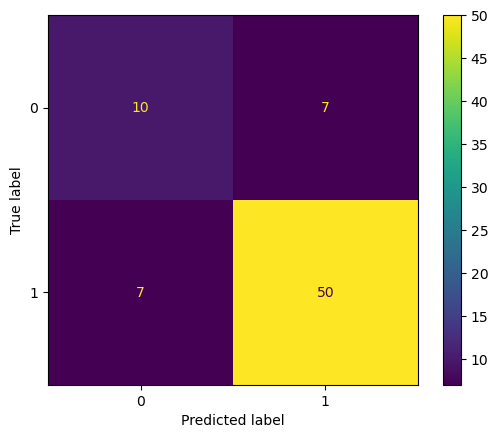

In [74]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_log, y_test_log)

In [75]:
print(classification_report(y_test_log, y_pred_log, target_names=['Tip not broken', 'Tip broken'])) #target names ändern?

                precision    recall  f1-score   support

Tip not broken       0.59      0.59      0.59        17
    Tip broken       0.88      0.88      0.88        57

      accuracy                           0.81        74
     macro avg       0.73      0.73      0.73        74
  weighted avg       0.81      0.81      0.81        74



Now we want to interpret precision, recall and f1 score of our logistic regression model:

**Precision:** 
Precision is the ratio of correctly predicted positive classes to all items predicted as positive. Therefore it tells us how correct or precise the positive predictions of our model are.

**Recall:**
Recall measures how many of the actual positive cases we were able to correctly predict. It is important if we believe that false negatives are more important than false positives.

**F1-Score:**
F1-Score is a performance metric that takes into account both precision and recall. It is calculated from the harmonic mean of the two metrics.


To further evaluate our logistic regression model, we can visualize the ROC curve (Receiver Operating Characteristic Curve). Previously, we had set the threshold value to 0.5. The ROC curve provides a visual way to observe changes in our model's classification thresholds that affect the model's performance. We plot the rate of true positives against the rate of false positives for all possible thresholds. This allows us to select the classification threshold at which we identify the most true-positive cases. 

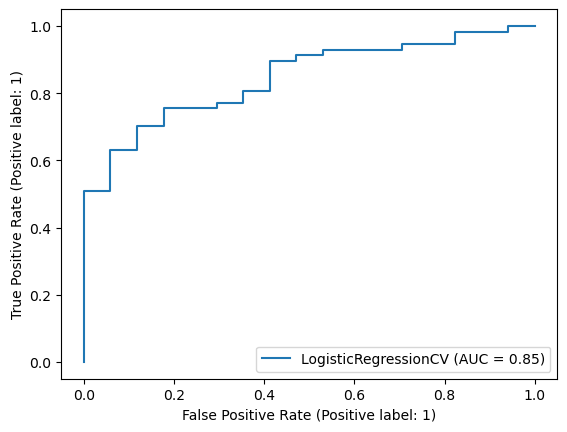

In [76]:
RocCurveDisplay.from_estimator(clf, X_test_log, y_test_log)

The curve shows that our model performs well, because the higher and closer to the perfect classifier the ROC curve is, the better the model performs.

Next, we can calculate the Area Under the ROC Curve (AUC). It is a performance measure which is independent of the exact classification threshold chosen. AUC is between 0 and 1, with higher numbers indicating better performance so our value indicates that the performance of our logistic regression model is very good.

In [77]:
y_score = clf.predict_proba(X_test_log)[:, 1]
roc_auc_score(y_test_log, y_score)

0.8462332301341589

### 5.5 Save model


We save our linear and logistic regression models in the models folder with pickle.

In [78]:
"""
To load the model use:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
"""

filename = 'reg_model.sav'
pickle.dump(reg, open(f"../models/{filename}", 'wb'))

filename_log = 'log_model.sav'
pickle.dump(clf, open(f"../models/{filename_log}", 'wb'))

## 6 Conclusions

The study on the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in Southern California provides valuable insights into the complex interplay between invasive plant species, biological control agents and the environment.

### 6.1 Linear Regression

The investigation into factors predicting the total main stem length of Dalmatian toadflax provides an opportunity to understand the key indicators of the plant's growth. This knowledge can contribute to the development of targeted strategies for managing and controlling Dalmatian toadflax populations in southern California.

- most useful predictor variables
- performance of the model




### 6.1 Logistic Regression

The hypothesis that weevil populations contribute to the reduction of Dalmatian toadflax vegetation seems to be supported by the research questions. If plants infested by weevils are found to be more likely to remain smaller, this indicates a possible link between the presence of weevils and the suppression of Dalmatian toadflax growth. This result is consistent with the biological control strategy, which aims to reduce the impact of the invasive plant on the ecosystem.

- most useful predictor variables
- performance of model

Understanding the ecological consequences of a weevil infestation depends on whether or not the tip of the plant is broken off. Broken tips could indicate potential stress or damage to the plant, and identifying predictive factors can improve our understanding of the overall impact of weevil activity.
